# Analysis for MOT beam SPCM signal drift

In [163]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import os
import csv
expdir = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"
import datetime
from datetime import datetime as dt
from datetime import time

In [107]:
# from https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

## 2023.09.01

SPCM signal with feedback on, monitored by running SamplerMOTCoilTune. I zeroed the potentiometer box and ran the code on differential mode, with the coil values set to what gave 10 kHz counts in a previous run. Note however that I was only getting ~ 8 kHz counts in the most recent run

In [140]:
f = h5py.File(os.path.join(results, '2023-08-31\\17\\000004757-SamplerMOTCoilTune.h5'))
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "SPCM_count_rate_Hz": shape (180005,), type "<f8">,
 <HDF5 dataset "SPCM_max_counts_and_volts": shape (5,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">]

In [141]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
counts_Hz = np.array(f['datasets']['SPCM_count_rate_Hz'])

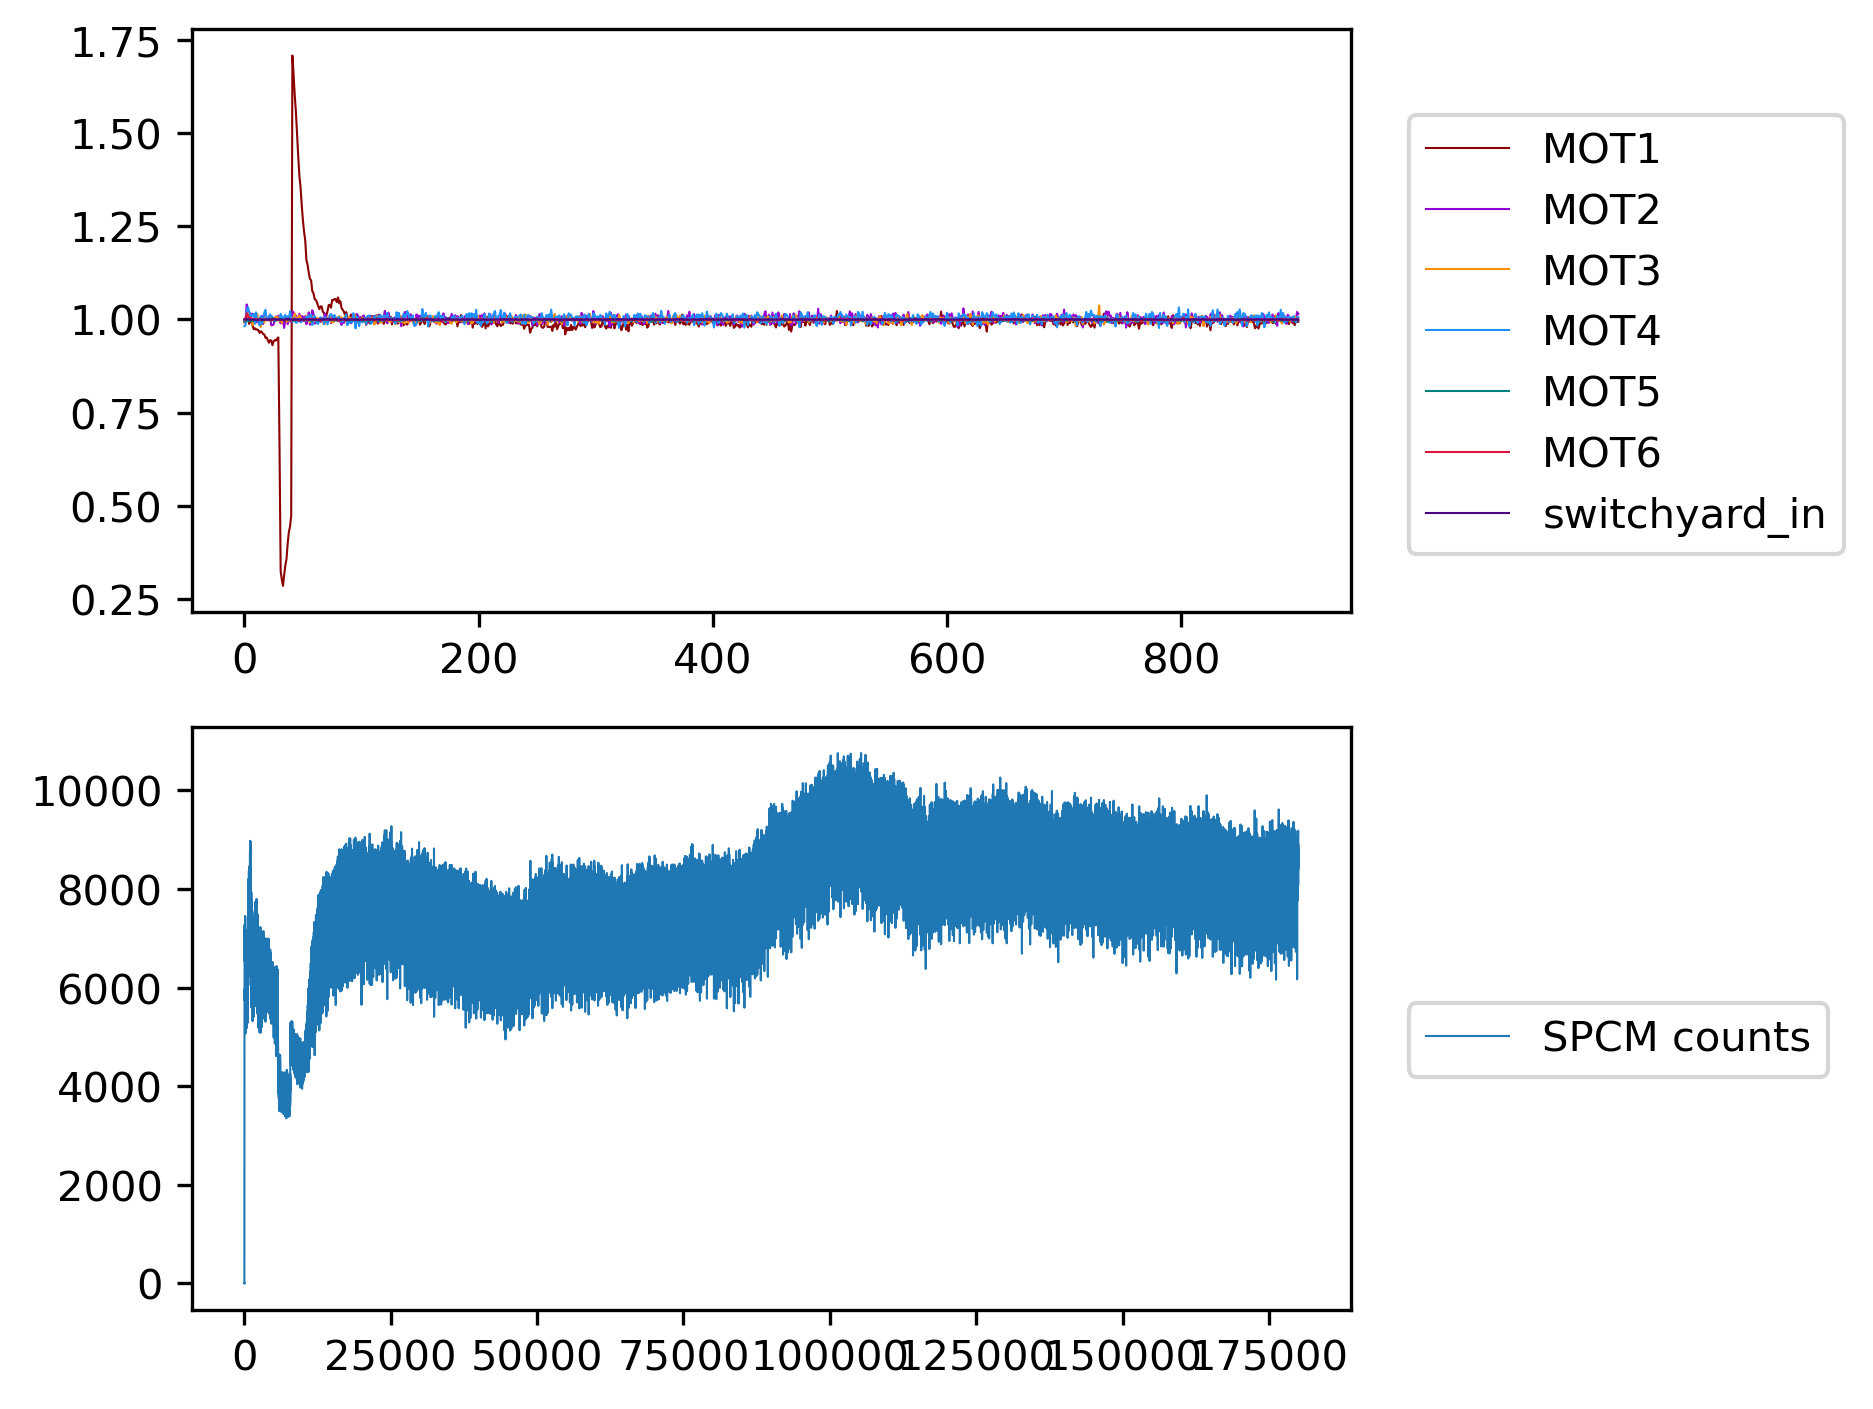

In [172]:
# the dip shown between about 30 and 500 is when I intentionally made the MOT go completely
# away by tuning the X shim, and then brought the MOT back to the same location "by hand".
# the duration of the experiment was about 10 minutes. every point showing the MOT power was
# plotted just after the feedback was run.

labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2,dpi=300)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
#     ax.scatter(xpts, ypts, color=color,s=0.1)
    ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
#     ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax2.plot(range(len(counts_Hz)),counts_Hz,label='SPCM counts',linewidth=0.5)
# ax2.set_
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()

In [169]:
[dt.time(0,0,0) + datetime.timedelta(hours=i) for i in range(12)]

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [166]:
[datetime.time(10,39) + time(,60)]

ValueError: minute must be in 0..59

## 2023.08.31

SPCM signal with feedback on, monitored by running SamplerMOTCoilTune. I zeroed the potentiometer box and ran the code on differential mode, with the coil values set to what gave 10 kHz counts in a previous run.

In [110]:
f = h5py.File(os.path.join(results, '2023-08-31\\15\\000004752-SamplerMOTCoilTune.h5'))
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "SPCM_count_rate_Hz": shape (2005,), type "<f8">,
 <HDF5 dataset "SPCM_max_counts_and_volts": shape (5,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">]

In [111]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
counts_Hz = np.array(f['datasets']['SPCM_count_rate_Hz'])

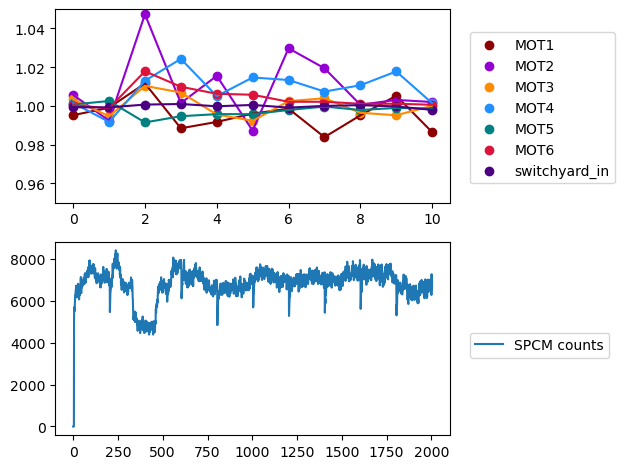

In [138]:
# the dip shown between about 30 and 500 is when I intentionally made the MOT go completely
# away by tuning the X shim, and then brought the MOT back to the same location "by hand".
# the duration of the experiment was about 10 minutes. every point showing the MOT power was
# plotted just after the feedback was run.

labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
    ax.scatter(xpts, ypts, label=label, color=color)
    ax.plot(xpts, ypts, color=color)
    ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax2.plot(range(len(counts_Hz)),counts_Hz,label='SPCM counts')
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()